In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
datasets= pd.read_csv("/netflix_titles.csv.zip")

In [ ]:
datasets.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
datasets.shape

(8807, 12)

In [ ]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
datasets.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


Distribution of contact type

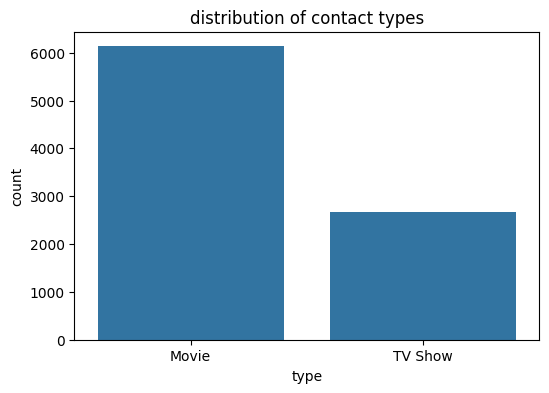

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="type",data=datasets)
plt.title("distribution of contact types")
plt.show()

Distribution of release date

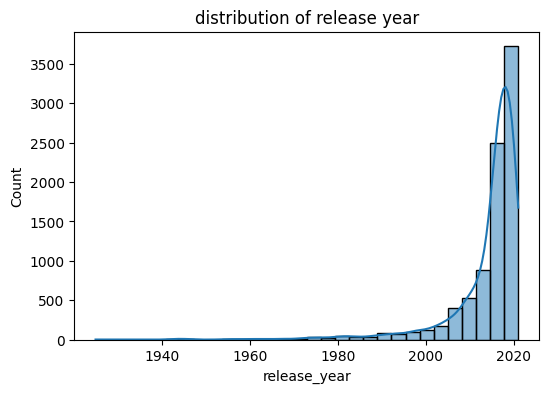

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(x="release_year",data=datasets,kde=True,bins=30)
plt.title("distribution of release year")
plt.show()

1. Top 10 countries producing content on Netflix.

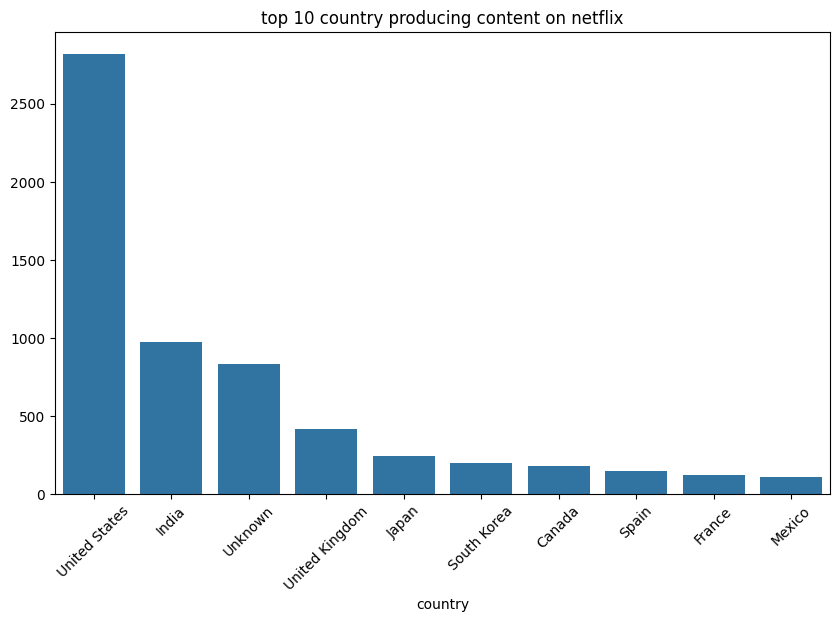

In [ ]:
datasets["country"].fillna("Unknown",inplace=True)
plt.figure(figsize=(10,6))
country_counts=datasets["country"].value_counts().nlargest(10)
sns.barplot(x=country_counts.index,y=country_counts.values)
plt.title("top 10 country producing content on netflix")
plt.xticks(rotation=45)
plt.show()


2.number of releases (movies and TV shows) changed year over year.

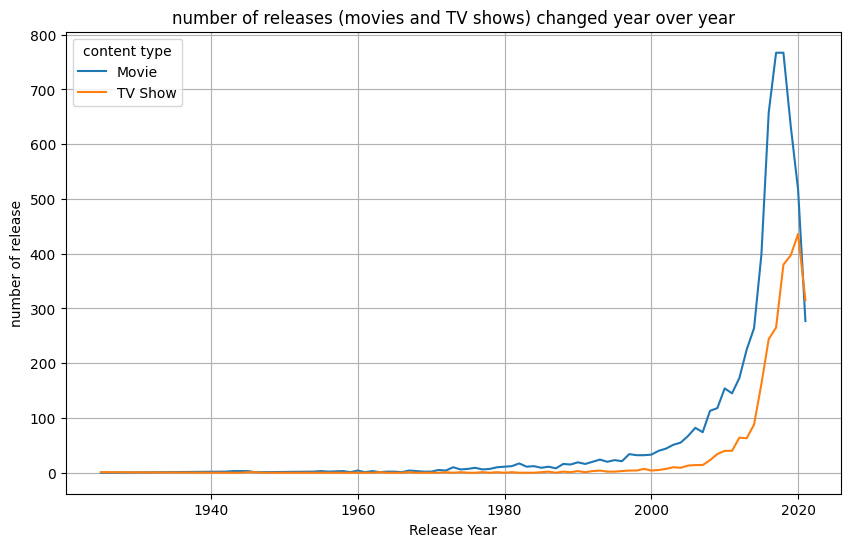

In [ ]:
release_by_year_type = datasets.groupby(["release_year", "type"]).size().unstack(fill_value=0)

plt.figure(figsize=(10,6))
release_by_year_type.plot(kind="line",ax=plt.gca())
plt.title("number of releases (movies and TV shows) changed year over year")
plt.xlabel("Release Year")
plt.ylabel("number of release")
plt.legend(title="content type")
plt.grid(True)
plt.show()


Analyze ratings distribution

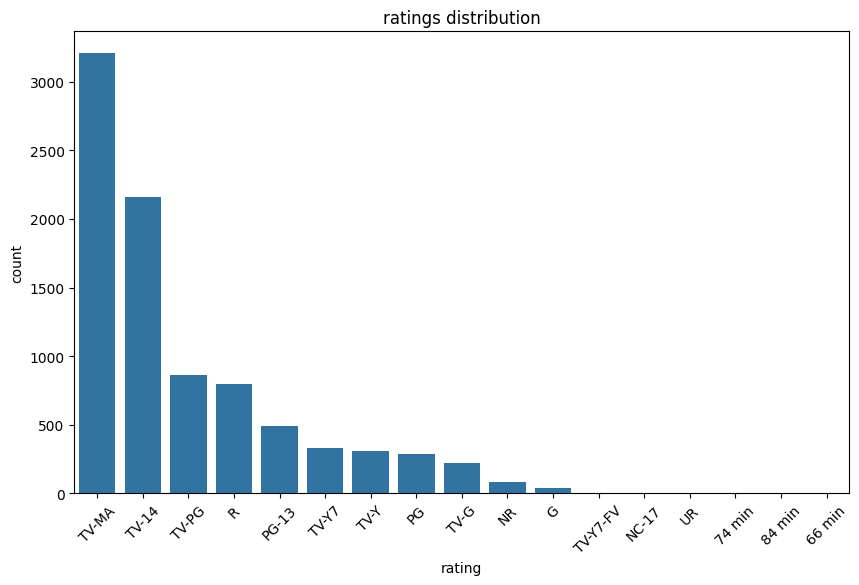

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="rating",data=datasets,order=datasets['rating'].value_counts().index)
plt.title("ratings distribution")
plt.xticks(rotation=45)
plt.show()

In [ ]:
directors_data=datasets["director"].dropna()

In [ ]:
director_list=directors_data.str.split(',').explode()

In [ ]:
director_counts=director_list.value_counts()

In [ ]:
director_counts

,count
director,
Rajiv Chilaka,22
Jan Suter,18
Raúl Campos,18
Suhas Kadav,16
Marcus Raboy,16
...,...
Jung Ji-woo,1
Azazel Jacobs,1
Zhang Yimou,1


In [ ]:
top_10_director=director_counts.nlargest(10)

In [ ]:
top_10_director

,count
director,
Rajiv Chilaka,22
Jan Suter,18
Raúl Campos,18
Suhas Kadav,16
Marcus Raboy,16
Jay Karas,15
Cathy Garcia-Molina,13
Jay Chapman,12
Martin Scorsese,12


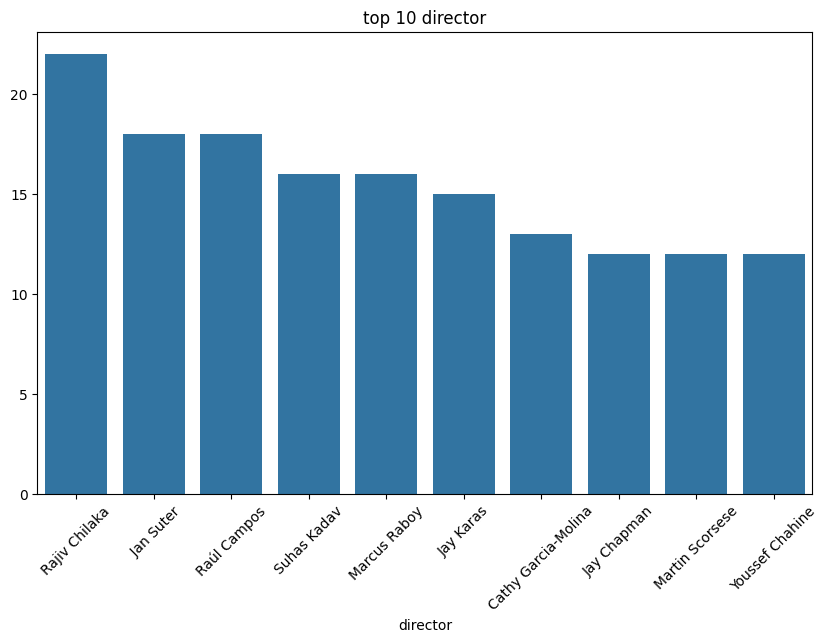

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_director.index,y=top_10_director.values)
plt.title("top 10 director")
plt.xticks(rotation=45)
plt.show()